# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
town = []
lat1 = []
lon1 = []
temp_max = []
humidity = []
wind = []
cloudiness = []
date = []
country = []

# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Using the API to extract required Data

n = 1
for city in cities:
    try:
            
            response = requests.get(query_url + city).json()
 
            lat1.append(response['coord']['lat'])
            lon1.append(response['coord']['lon'])
            temp_max.append(response["main"]["temp_max"])
            humidity.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloudiness.append(response['clouds']['all'])
            date.append(response['dt'])
            country.append(response["sys"]["country"])
            town.append(response["name"])
        
            print ("Processing Record " + str(n) + ":" + " " + str(city))
            n = n+1
    except KeyError:
            print("City not found. Skipping...")






Processing Record 1: honiara
Processing Record 2: ponta do sol
Processing Record 3: pevek
Processing Record 4: wonthaggi
Processing Record 5: ushuaia
Processing Record 6: santa rosa
Processing Record 7: cayenne
Processing Record 8: hermanus
Processing Record 9: los llanos de aridane
Processing Record 10: atasu
Processing Record 11: saint-joseph
Processing Record 12: port elizabeth
Processing Record 13: sioux lookout
Processing Record 14: jamestown
Processing Record 15: qaanaaq
Processing Record 16: albany
Processing Record 17: san rafael
Processing Record 18: marzuq
Processing Record 19: carnarvon
Processing Record 20: vaini
City not found. Skipping...
Processing Record 21: upernavik
Processing Record 22: kholm-zhirkovskiy
Processing Record 23: mar del plata
Processing Record 24: nome
Processing Record 25: cape town
Processing Record 26: hilo
Processing Record 27: lebu
Processing Record 28: shingu
Processing Record 29: busselton
Processing Record 30: chuy
Processing Record 31: balkhash

Processing Record 242: ponta delgada
Processing Record 243: fort collins
Processing Record 244: fortuna
Processing Record 245: nauchnyy gorodok
Processing Record 246: huarmey
Processing Record 247: port-gentil
Processing Record 248: okhotsk
Processing Record 249: fort nelson
Processing Record 250: arman
Processing Record 251: bundaberg
Processing Record 252: arrifes
Processing Record 253: lisakovsk
Processing Record 254: acarau
Processing Record 255: cabo san lucas
Processing Record 256: novyy urengoy
Processing Record 257: itoman
Processing Record 258: yeppoon
Processing Record 259: garowe
Processing Record 260: asau
Processing Record 261: constitucion
Processing Record 262: chernaya kholunitsa
Processing Record 263: geraldton
City not found. Skipping...
Processing Record 264: iqaluit
Processing Record 265: te anau
Processing Record 266: mangrol
Processing Record 267: sept-iles
Processing Record 268: east london
City not found. Skipping...
Processing Record 269: tabuk
Processing Recor

Processing Record 476: rotterdam
Processing Record 477: vestmannaeyjar
Processing Record 478: kalmunai
City not found. Skipping...
City not found. Skipping...
Processing Record 479: exmouth
Processing Record 480: wanning
Processing Record 481: turukhansk
Processing Record 482: lingao
Processing Record 483: nyurba
Processing Record 484: oussouye
City not found. Skipping...
Processing Record 485: stary plzenec
Processing Record 486: tsabong
Processing Record 487: constantine
Processing Record 488: palana
City not found. Skipping...
Processing Record 489: sakakah
Processing Record 490: hagere selam
City not found. Skipping...
Processing Record 491: launceston
Processing Record 492: jalu
Processing Record 493: azare
Processing Record 494: beringovskiy
Processing Record 495: raudeberg
Processing Record 496: progreso
Processing Record 497: texarkana
Processing Record 498: gazli
Processing Record 499: miraflores
Processing Record 500: arroyo
Processing Record 501: jinchang
Processing Record 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# printing lengths of lists so as to ensure they are of same size
print(len(temp_max))
print(len(humidity))
print(len(wind))
print(len(cloudiness))
print(len(date))
print(len (country))
print(len (lat1))
print(len (lon1))

550
550
550
550
550
550
550
550


In [5]:
#Creaing Data Frame
weather_dict = {
    "city": town,
    "cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "lat" : lat1,
    "lon" : lon1,
    "Max Temp" : temp_max,
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data
#Saving Data Frame
weather_data.to_csv (r'../output_data/cities.csv', index = False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

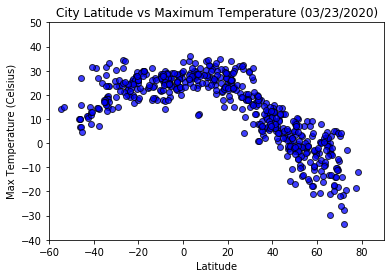

In [6]:
x_axis = lat1
data = temp_max
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs Maximum Temperature (03/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.ylim(-40,50)
plt.xlim(-60,90)
#lat_range = (-90, 90)
plt.savefig("../output_data/fig1.png")
plt.show()
# Graph shows that higher latitude regions have lower temperatures. Also, Temperatures peak around equator (lat =0)

#### Latitude vs. Humidity Plot

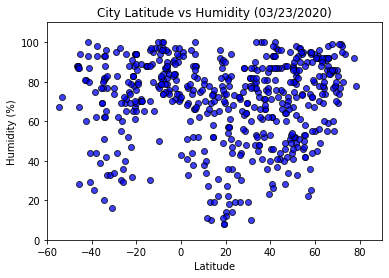

In [7]:
x_axis = lat1
data = humidity
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs Humidity (03/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-0,110)
plt.xlim(-60,90)
#lat_range = (-90, 90)
plt.savefig("../output_data/fig2.png")
plt.show()
#Graph shows Humidity is high (>50%) across most of the regions irrespective of their latitude

#### Latitude vs. Cloudiness Plot

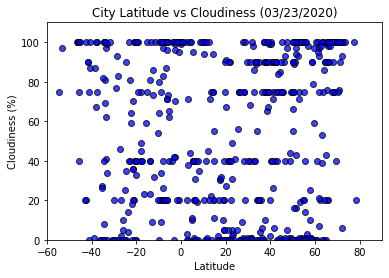

In [8]:
x_axis = lat1
data = cloudiness
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs Cloudiness (03/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,110)
plt.xlim(-60,90)
#lat_range = (-90, 90)
plt.savefig("../output_data/fig3.png")
plt.show()
#Scatter plot shows that cloudiness is forming clusters at specific points (such as 0%, 20%, 40%, 100%)

#### Latitude vs. Wind Speed Plot

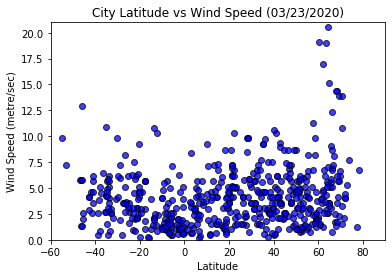

In [9]:
x_axis = lat1
data = wind
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs Wind Speed (03/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (metre/sec)")
plt.ylim(0,21)
plt.xlim(-60,90)
#lat_range = (-90, 90)
plt.savefig("../output_data/fig4.png")
plt.show()
# Wind speed is not very high (< 7 metre/sec) across most of the cities irrespective of their latitude positions

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[ weather_data['lat'] >= 0]


southern = weather_data.loc[ weather_data['lat'] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8888258619279842


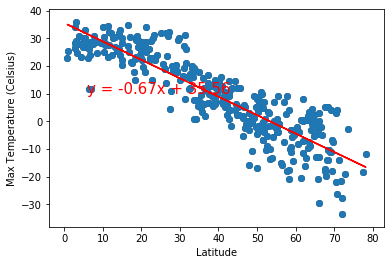

In [12]:
x_values = northern['lat']
y_values = northern['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()
#In Northern Hemisphere Temp has strong inverse (r square -0.88) relationship with Latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.24x + 27.77
The r-squared is: 0.551406195465038


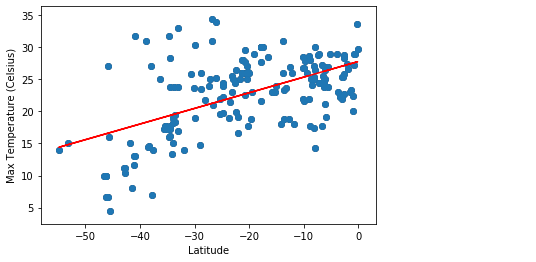

In [13]:
x_values = southern['lat']
y_values = southern['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()
#In Southern Hemisphere Temp has not so strong but positive (r square 0.55) relationship with Latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2804459781705794


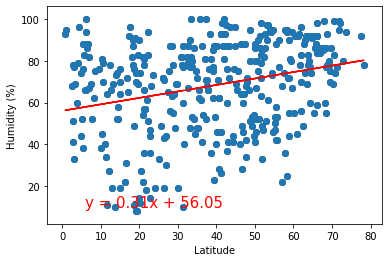

In [14]:
x_values = northern['lat']
y_values = northern['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x + 83.84
The r-squared is: 0.2873318135222822


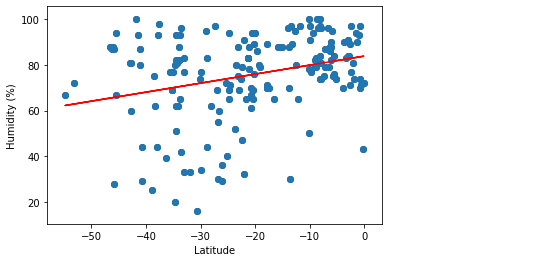

In [15]:
x_values = southern['lat']
y_values = southern['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2785560460964653


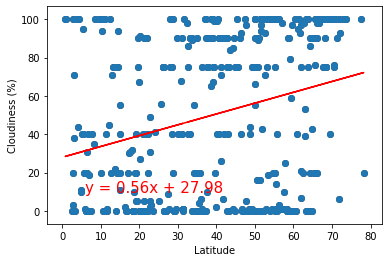

In [16]:
x_values = northern['lat']
y_values = northern['cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.25x + 62.67
The r-squared is: 0.0907755255829527


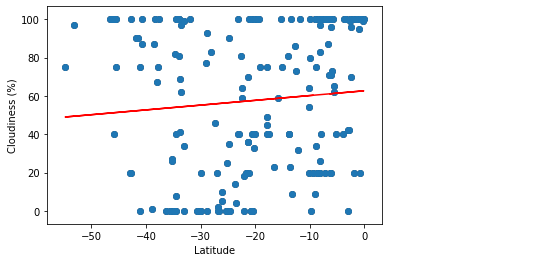

In [17]:
x_values = southern['lat']
y_values = southern['cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print (line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()
#In South Hemisphere Cloudiness is almost independent (r square 0.09)  of Latitude position of the city

####  Northern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression

y = 0.03x + 3.17
The r-squared is: 0.20690374852623064


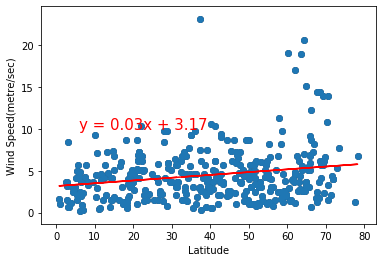

In [18]:
x_values = northern['lat']
y_values = northern['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(metre/sec)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print (line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression

y = -0.06x + 2.06
The r-squared is: -0.37154996330482004


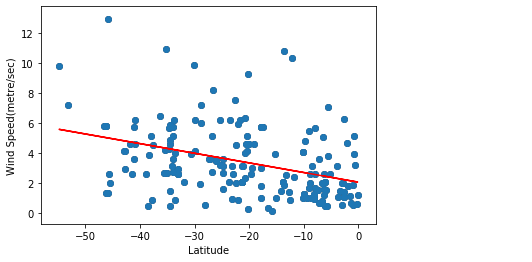

In [19]:
x_values = southern['lat']
y_values = southern['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(metre/sec)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print (line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()
#Compared to northern hemisphere (r square 0.20 Wind speeds in southern hemisphere (r square -0.37) have more stronger relationshp with latitude